# Import libraries

In [1]:
# Packages
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
warnings.filterwarnings('ignore')

# Constants
alpha = 0.05
data_file = '../data/bank-full.csv'

# Read data

In [2]:
# Read csv file
df = pd.read_csv('bank-full.csv',sep=';')

# Rename last column
df = df.rename(columns={'y' : 'subscription'})

# Show sample
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Exploratory data analysis

## Utility functions

In [3]:
def twoSampleZTest(X1, X2, two_tail=True):
    # Sample sizes
    N1, N2 = len(X1), len(X2)
    
    # Calculate mean
    X1_bar = np.mean(X1)
    X2_bar = np.mean(X2)
    
    # Calculate population variance
    sigma1 = np.var(X1)
    sigma2 = np.var(X2)
    
    # Z-statistic + pvalue
    Z = (X1_bar - X2_bar) / np.sqrt(sigma1/N1 + sigma2/N2)
    if(two_tail):
        pvalue = 2 * stats.norm.sf(abs(Z))
    else:
        pvalue = stats.norm.sf(abs(Z))
    return Z, pvalue

def oneSampleTTest(X, mu, two_tail=True):
    # Sample size
    N = len(X)

    # Calculate mean
    Xbar = np.mean(X)

    # Sample variance
    S = (1 / (N-1)) ** np.sum((X - mu)**2)

    # T-statistic + pvalue
    T = (Xbar - mu) / (S / np.sqrt(N))
    if(two_tail):
        pvalue = 2 * stats.t.sf(abs(T), N-1)
    else:
        pvalue = stats.t.sf(abs(T), N-1)
    return T, pvalue

def proportionDiffTest(p0, p1, p2, n1, n2):
    # Z-statistic + pvalue
    Z = (p1 - p2) / np.sqrt(p0 * (1 - p0) * (1/n1 + 1/n2))
    pvalue = 2 * stats.norm.sf(abs(Z))
    return Z, pvalue

def summary_for_category(df, category):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Visualization
    sns.countplot(data=df, x=category, hue=None, ax=ax[0])
    sns.countplot(data=df, x=category, hue='subscription', ax=ax[1])
    ax[0].tick_params(axis='x', rotation=90)
    ax[1].tick_params(axis='x', rotation=90)

    plt.show()

    # Subscription rate by category
    sub_rates = {}
    for occupation in df[category].unique():
        total = len(df[df[category] == occupation])
        subscribed = len(df[(df[category] == occupation) & (df['subscription'] == 'yes')])
        rate = subscribed / total
        
        sub_rates[occupation] = rate

    # Sort by values
    sub_rates_sorted = sorted(sub_rates, key=sub_rates.get)
    for category_item in sub_rates_sorted:
        print(f'Subcription rate for {category}={category_item} : {sub_rates[category_item]:.2f}')

    # Check if any group has a significantly different subscription rate
    p0 = len(df[df['subscription'] == 'yes']) / len(df)
    print(f'Overall subscription rate : {p0:.2f}')
    for category_item in sub_rates_sorted:
        p1 = sub_rates[category_item]
        n1 = len(df[df[category] == category_item])
        
        others = df[df[category] != category_item]
        others_subscribed = len(others[others['subscription'] == 'yes'])
        p2 = others_subscribed / len(others)
        n2 = len(others)
        
        Z, pvalue = proportionDiffTest(p0, p1, p2, n1, n2)
        print('--------------------------------------------------------------------')
        print(f'For {category_item}')
        print(f'  - n1 = {n1}, n2 = {n2}, p1 = {p1:.2f}, p2 = {p2:.2f}')
        print(f'  - Z-statistic for proportion = {Z:.4f}, p-value = {pvalue:.4f}')
        
def summary_for_numerical(df, category):
    # Visualization
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    df[category].hist(ax=axes[0])
    sns.boxplot(data=df, y=category, x='subscription', ax=axes[1])
    sns.pointplot(data=df, y=category, x='subscription', ax=axes[2])
    plt.show()
    
    # Difference in the two group
    # Is there a significant difference in age between the two groups
    X1 = df[df['subscription'] == 'yes'][category].values
    X2 = df[df['subscription'] == 'no'][category].values

    # Check if mu_subscribed \ne mu_nosubscribe
    Z, pvalue = twoSampleZTest(X1, X2)
    print(f'Z-statistic = {Z}, pvalue = {pvalue}')

    # Conclude (2-tailed test)
    if(pvalue < alpha/2):
        print('There is a significant difference')
    else:
        print('There is no significant difference')


## A. Lazy EDA

## 1. Age distribution

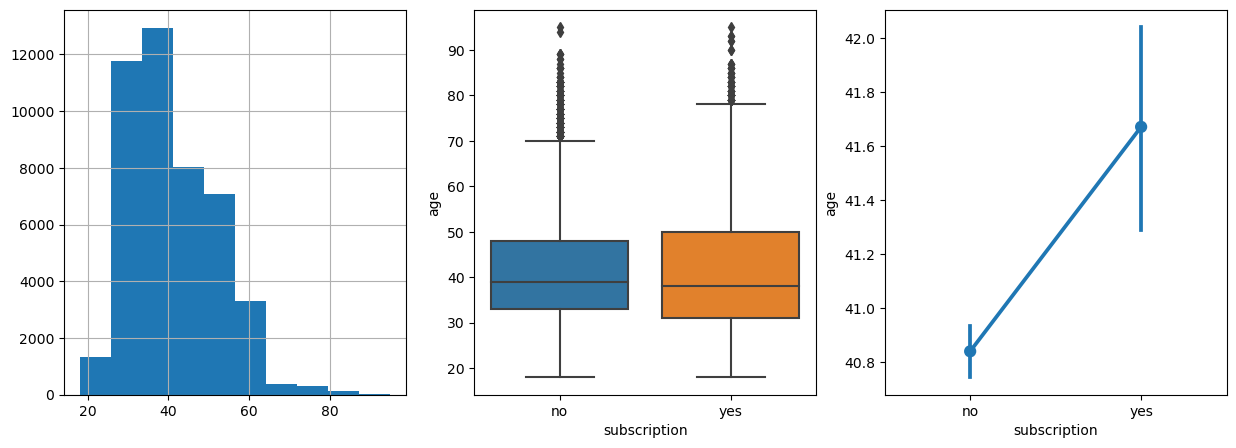

Z-statistic = 4.318701093196288, pvalue = 1.5695017674411086e-05
There is a significant difference


In [4]:
summary_for_numerical(df, 'age')

## 2. Client's occupation

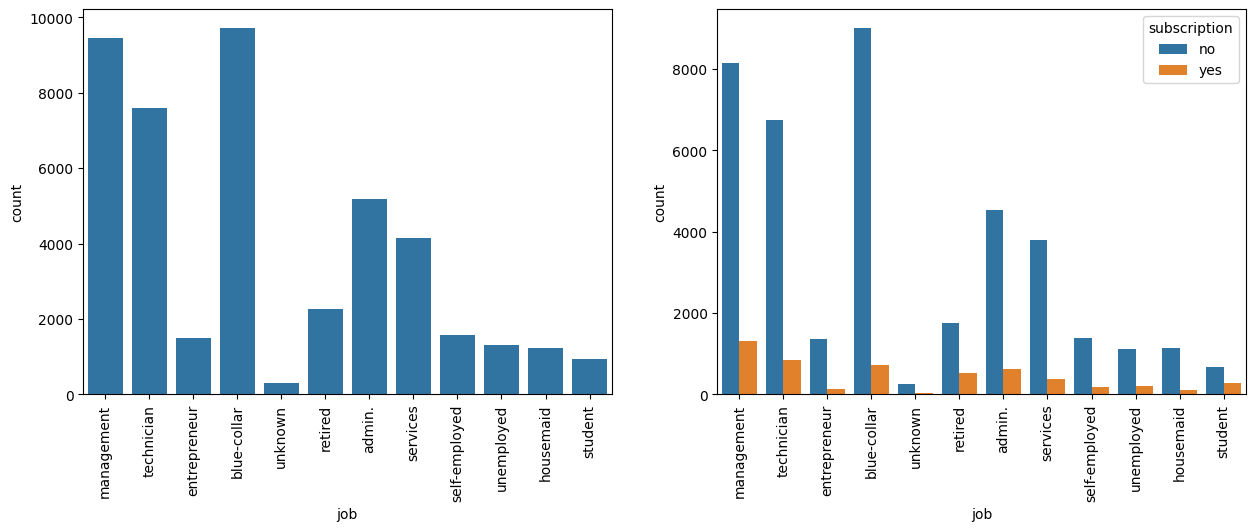

Subcription rate for job=blue-collar : 0.07
Subcription rate for job=entrepreneur : 0.08
Subcription rate for job=housemaid : 0.09
Subcription rate for job=services : 0.09
Subcription rate for job=technician : 0.11
Subcription rate for job=unknown : 0.12
Subcription rate for job=self-employed : 0.12
Subcription rate for job=admin. : 0.12
Subcription rate for job=management : 0.14
Subcription rate for job=unemployed : 0.16
Subcription rate for job=retired : 0.23
Subcription rate for job=student : 0.29
Overall subscription rate : 0.12
--------------------------------------------------------------------
For blue-collar
  - n1 = 9732, n2 = 35479, p1 = 0.07, p2 = 0.13
  - Z-statistic for proportion = -15.3270, p-value = 0.0000
--------------------------------------------------------------------
For entrepreneur
  - n1 = 1487, n2 = 43724, p1 = 0.08, p2 = 0.12
  - Z-statistic for proportion = -4.1808, p-value = 0.0000
--------------------------------------------------------------------
For ho

In [5]:
summary_for_category(df, 'job')

## 3. Client's marital status

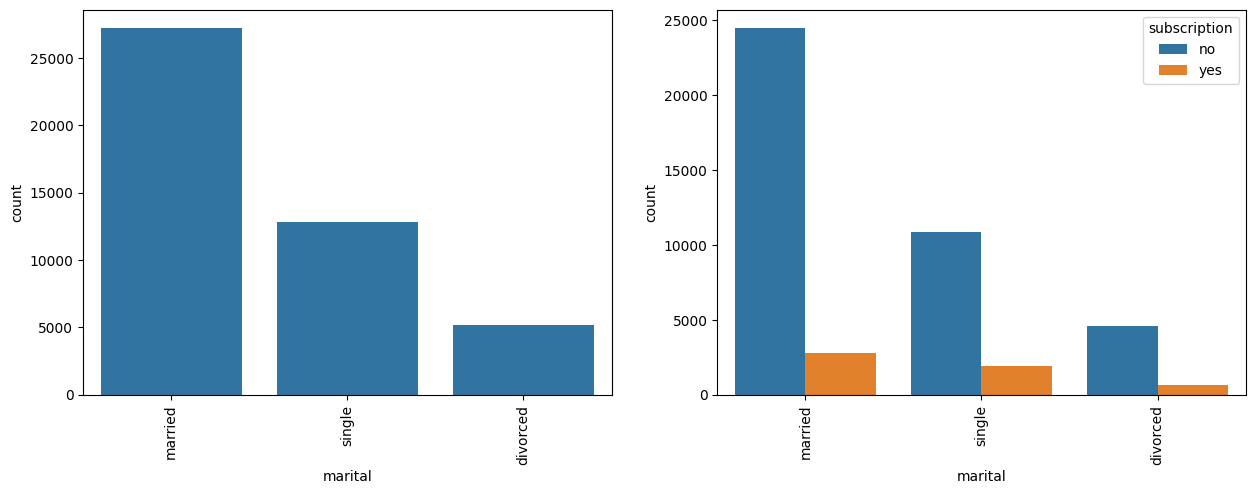

Subcription rate for marital=married : 0.10
Subcription rate for marital=divorced : 0.12
Subcription rate for marital=single : 0.15
Overall subscription rate : 0.12
--------------------------------------------------------------------
For married
  - n1 = 27214, n2 = 17997, p1 = 0.10, p2 = 0.14
  - Z-statistic for proportion = -12.8131, p-value = 0.0000
--------------------------------------------------------------------
For divorced
  - n1 = 5207, n2 = 40004, p1 = 0.12, p2 = 0.12
  - Z-statistic for proportion = 0.5895, p-value = 0.5555
--------------------------------------------------------------------
For single
  - n1 = 12790, n2 = 32421, p1 = 0.15, p2 = 0.10
  - Z-statistic for proportion = 13.5074, p-value = 0.0000


In [6]:
summary_for_category(df, 'marital')

## 3. Client's education level

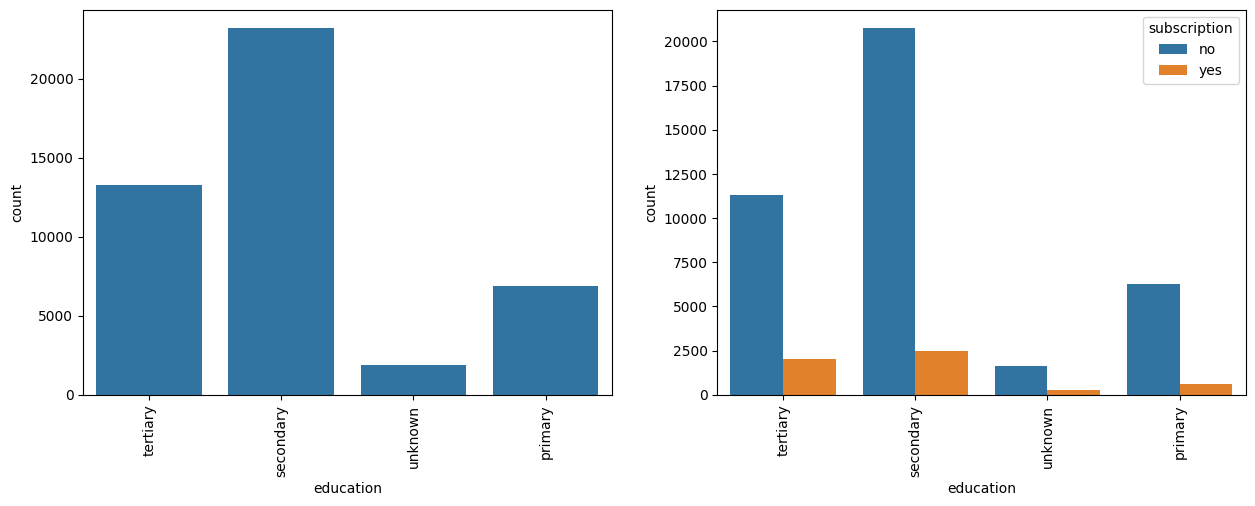

Subcription rate for education=primary : 0.09
Subcription rate for education=secondary : 0.11
Subcription rate for education=unknown : 0.14
Subcription rate for education=tertiary : 0.15
Overall subscription rate : 0.12
--------------------------------------------------------------------
For primary
  - n1 = 6851, n2 = 38360, p1 = 0.09, p2 = 0.12
  - Z-statistic for proportion = -8.5888, p-value = 0.0000
--------------------------------------------------------------------
For secondary
  - n1 = 23202, n2 = 22009, p1 = 0.11, p2 = 0.13
  - Z-statistic for proportion = -7.7371, p-value = 0.0000
--------------------------------------------------------------------
For unknown
  - n1 = 1857, n2 = 43354, p1 = 0.14, p2 = 0.12
  - Z-statistic for proportion = 2.5628, p-value = 0.0104
--------------------------------------------------------------------
For tertiary
  - n1 = 13301, n2 = 31910, p1 = 0.15, p2 = 0.10
  - Z-statistic for proportion = 14.1288, p-value = 0.0000


In [7]:
summary_for_category(df, 'education')

## 4. Credit in default?

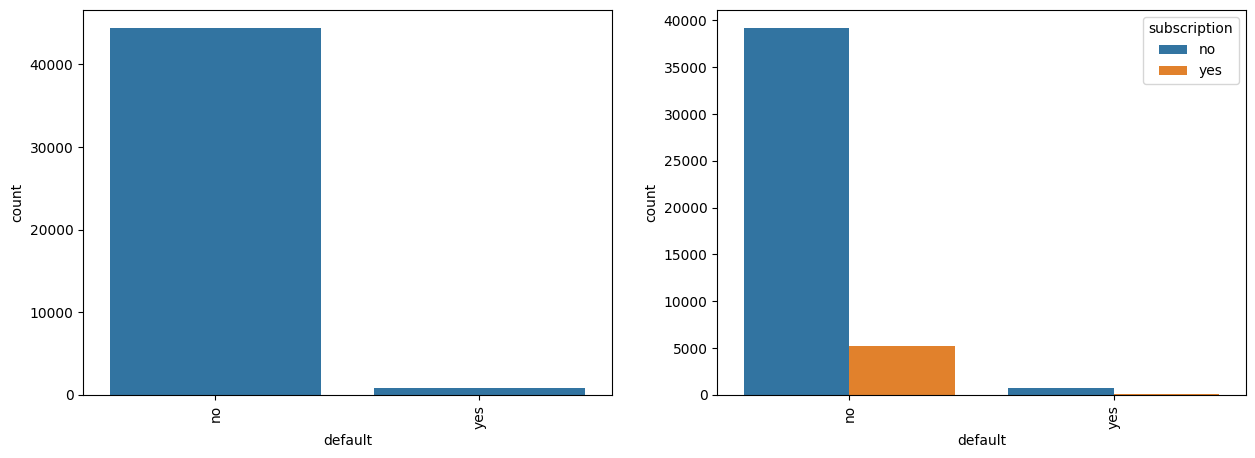

Subcription rate for default=yes : 0.06
Subcription rate for default=no : 0.12
Overall subscription rate : 0.12
--------------------------------------------------------------------
For yes
  - n1 = 815, n2 = 44396, p1 = 0.06, p2 = 0.12
  - Z-statistic for proportion = -4.7669, p-value = 0.0000
--------------------------------------------------------------------
For no
  - n1 = 44396, n2 = 815, p1 = 0.12, p2 = 0.06
  - Z-statistic for proportion = 4.7669, p-value = 0.0000


In [8]:
summary_for_category(df, 'default')

## 5. Housing loan?

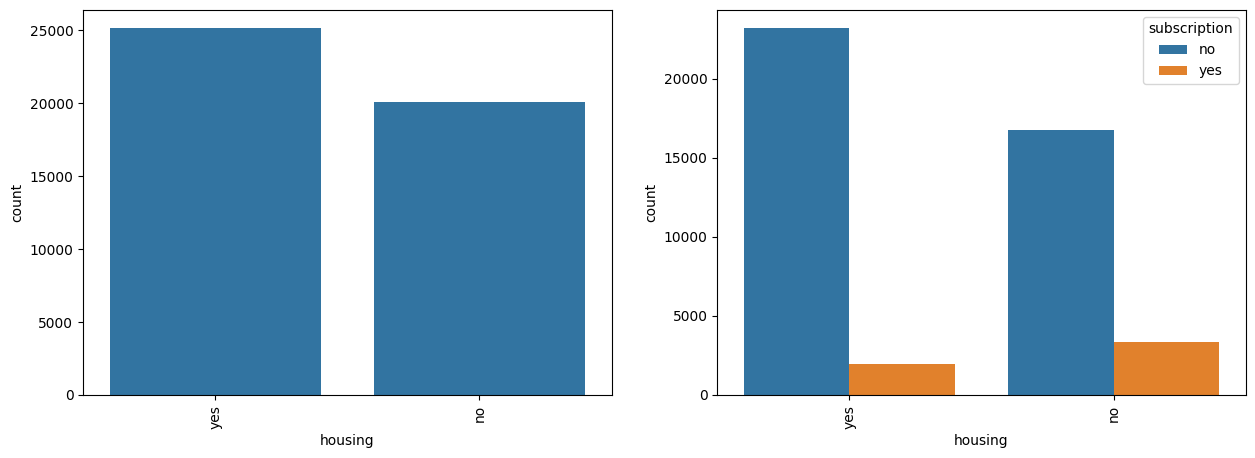

Subcription rate for housing=yes : 0.08
Subcription rate for housing=no : 0.17
Overall subscription rate : 0.12
--------------------------------------------------------------------
For yes
  - n1 = 25130, n2 = 20081, p1 = 0.08, p2 = 0.17
  - Z-statistic for proportion = -29.5921, p-value = 0.0000
--------------------------------------------------------------------
For no
  - n1 = 20081, n2 = 25130, p1 = 0.17, p2 = 0.08
  - Z-statistic for proportion = 29.5921, p-value = 0.0000


In [9]:
summary_for_category(df, 'housing')

## 6. Personal loan?

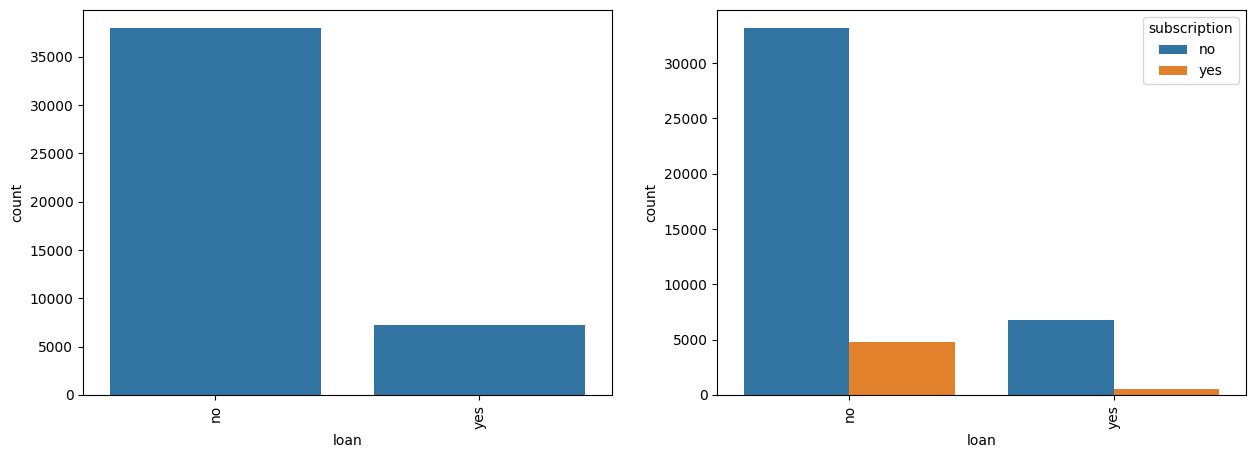

Subcription rate for loan=yes : 0.07
Subcription rate for loan=no : 0.13
Overall subscription rate : 0.12
--------------------------------------------------------------------
For yes
  - n1 = 7244, n2 = 37967, p1 = 0.07, p2 = 0.13
  - Z-statistic for proportion = -14.4981, p-value = 0.0000
--------------------------------------------------------------------
For no
  - n1 = 37967, n2 = 7244, p1 = 0.13, p2 = 0.07
  - Z-statistic for proportion = 14.4981, p-value = 0.0000


In [10]:
summary_for_category(df, 'loan')

## 7. Annual average balance

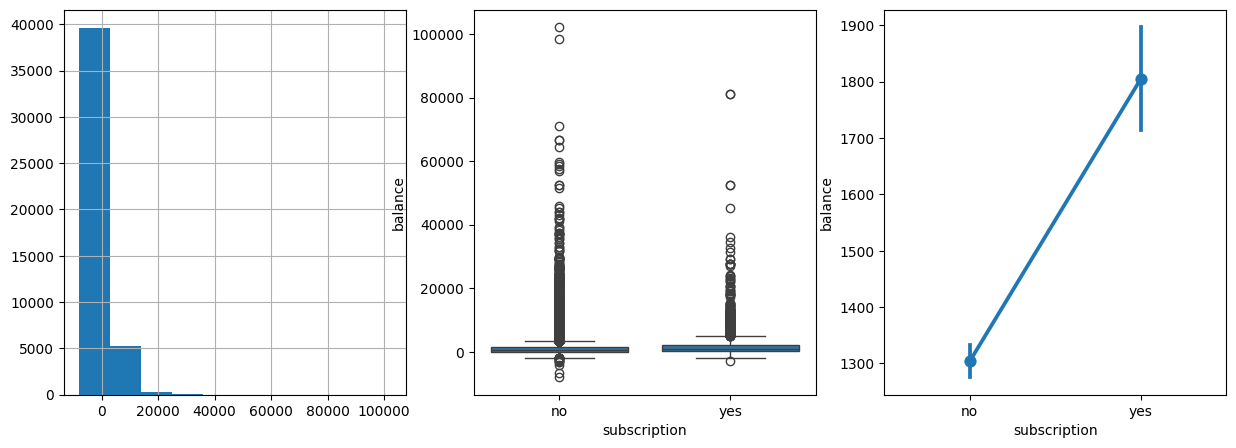

Z-statistic = 9.934413491831075, pvalue = 2.9490628671161696e-23
There is a significant difference


In [11]:
summary_for_numerical(df, 'balance')

# B. Not so lazy EDA

## 1. Pairplots - see if we can cluster anything

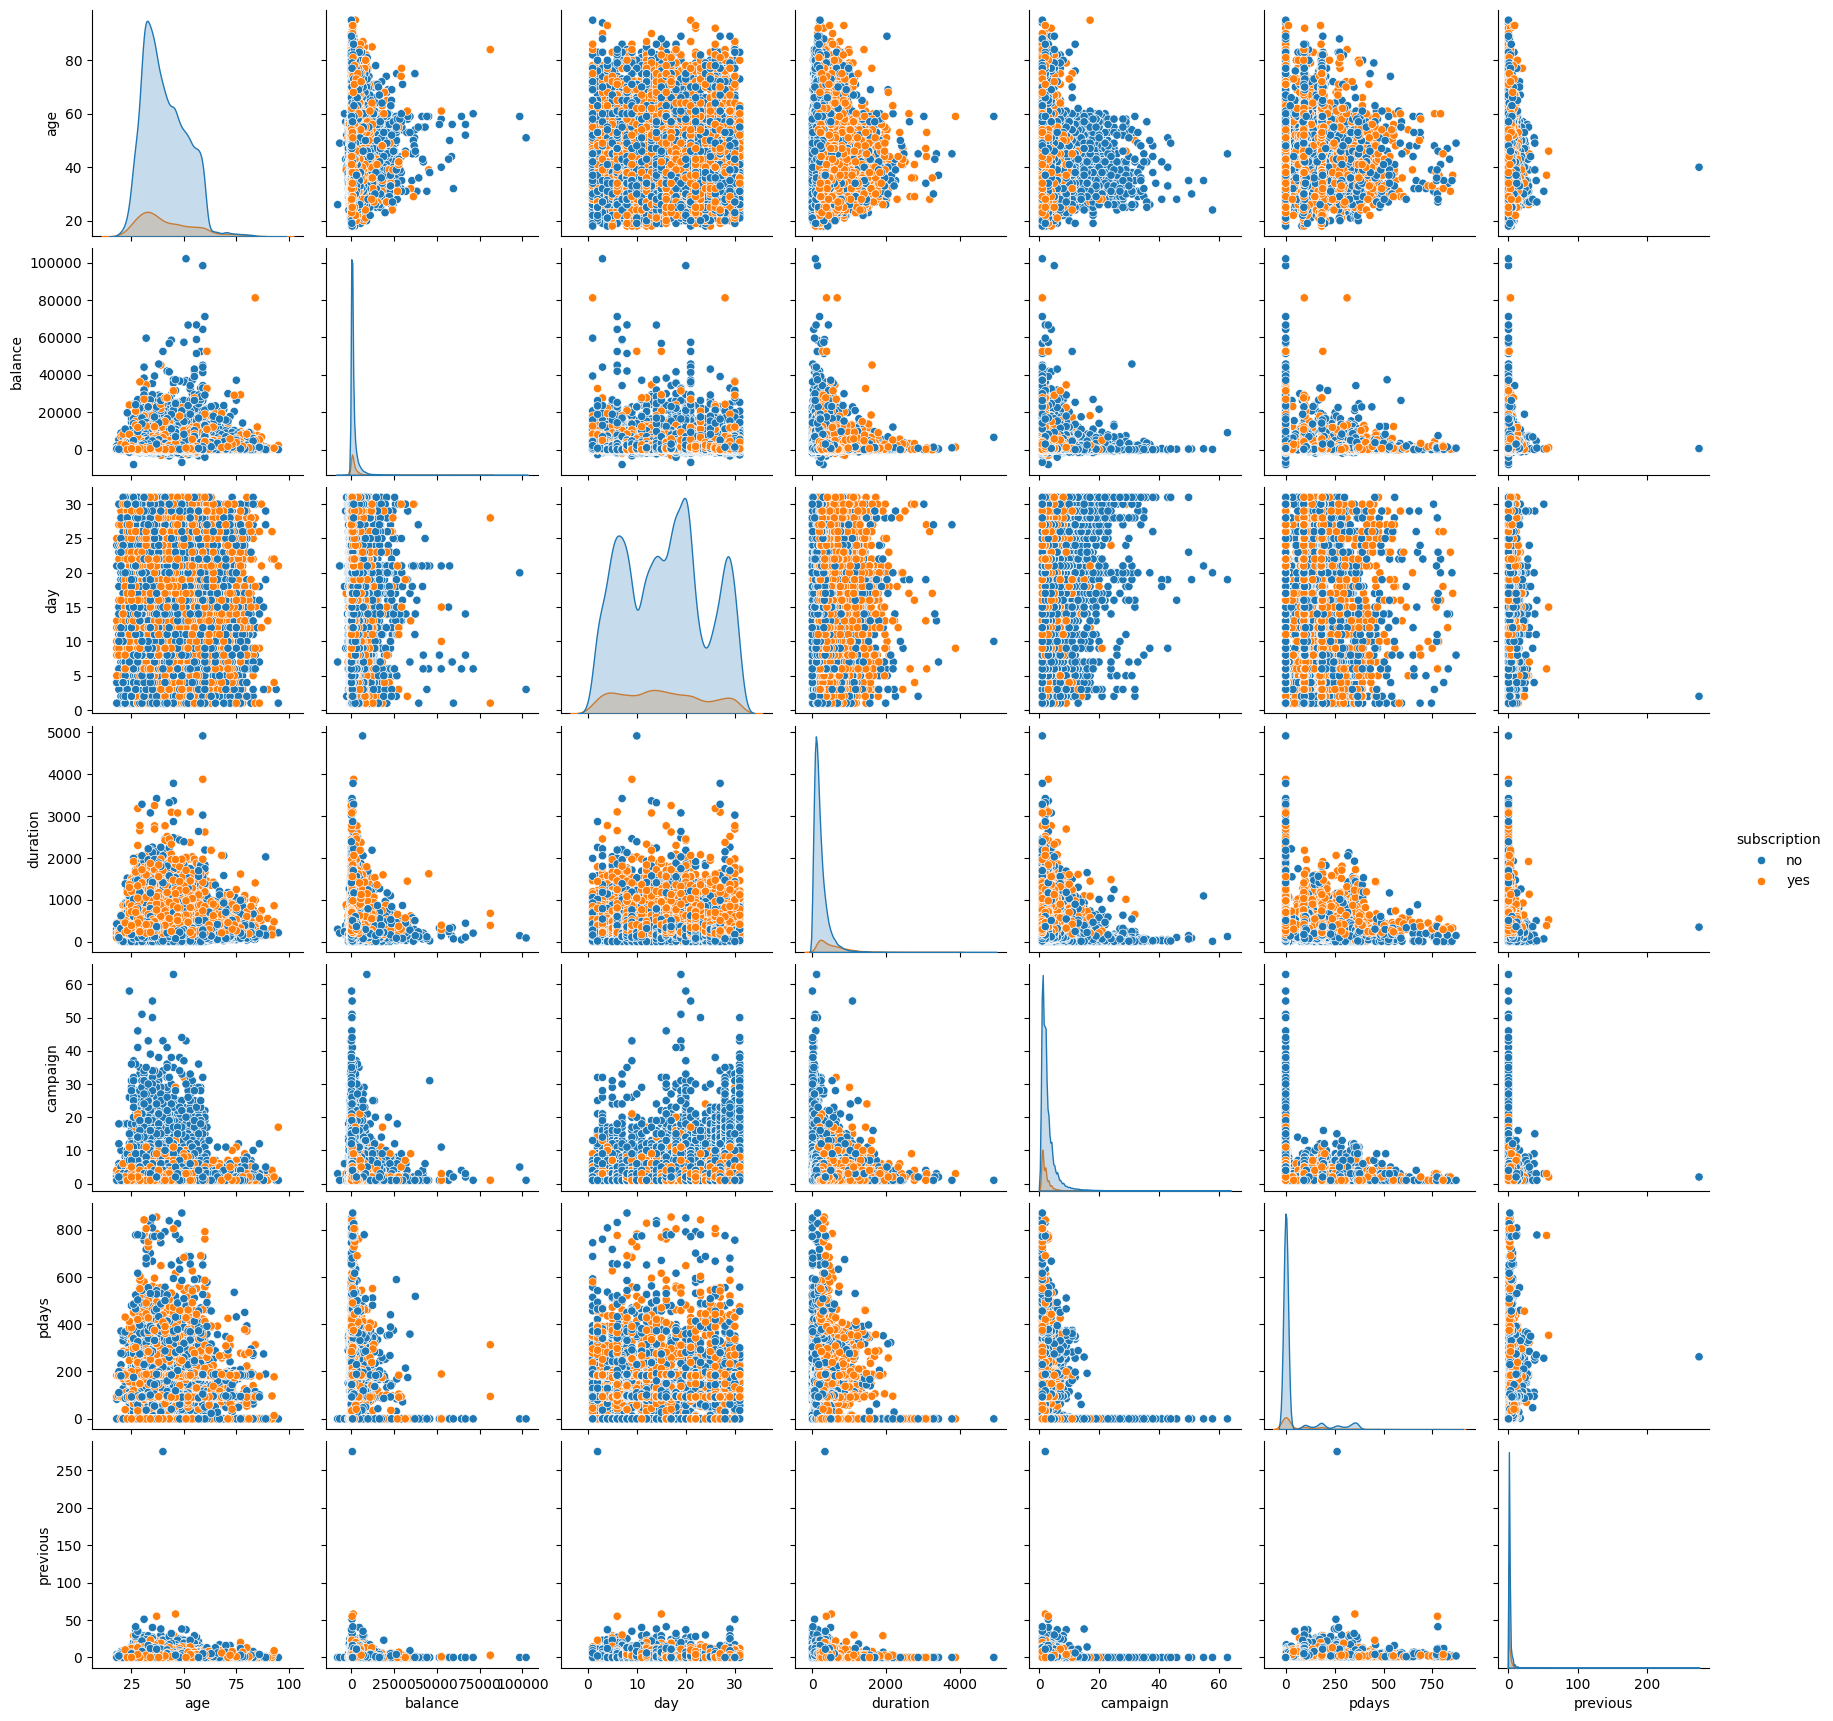

In [12]:
sns.pairplot(data=df, hue='subscription')
plt.show()

## 2. Correlation matrix

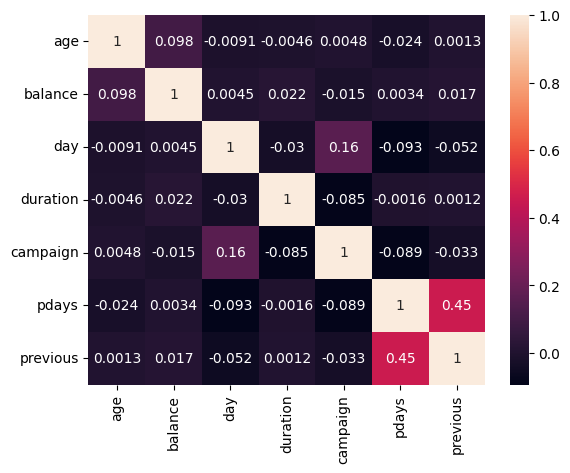

In [14]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Data preprocessing utilities

In [4]:
from sklearn.preprocessing import LabelEncoder

job_labelenc = LabelEncoder()
marital_labelenc = LabelEncoder()
contact_labelenc = LabelEncoder()
poutcome_labelenc = LabelEncoder()

def preproc_education(x):
    if(x == 'unknown') : return 0
    elif(x == 'primary') : return 1
    elif(x == 'secondary') : return 2
    elif(x == 'tertiary') : return 3
    
def preproc_month(x):
    if(x == 'jan') : return 1
    elif(x == 'feb') : return 2
    elif(x == 'mar') : return 3
    elif(x == 'apr') : return 4
    elif(x == 'may') : return 5
    elif(x == 'jun') : return 6
    elif(x == 'jul') : return 7
    elif(x == 'aug') : return 8
    elif(x == 'sep') : return 9
    elif(x == 'oct') : return 10
    elif(x == 'nov') : return 11
    elif(x == 'dec') : return 12
    
def preproc_binary(x):
    if(x == 'no') : return 0
    elif(x == 'yes') : return 1

# Re-read
df = pd.read_csv('bank-full.csv',sep=';')

# Rename last column
df = df.rename(columns={'y' : 'subscription'})

# ALl preprocessing steps
df['job'] = job_labelenc.fit_transform(df['job'])
df['marital'] = marital_labelenc.fit_transform(df['marital'])
df['contact'] = contact_labelenc.fit_transform(df['contact'])
df['poutcome'] = poutcome_labelenc.fit_transform(df['poutcome'])
df['education'] = df['education'].apply(preproc_education)
df['month'] = df['month'].apply(preproc_month)
df['default'] = df['default'].apply(preproc_binary)
df['housing'] = df['housing'].apply(preproc_binary)
df['loan'] = df['loan'].apply(preproc_binary)

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,4,1,3,0,2143,1,0,2,5,5,261,1,-1,0,3,no
1,44,9,2,2,0,29,1,0,2,5,5,151,1,-1,0,3,no
2,33,2,1,2,0,2,1,1,2,5,5,76,1,-1,0,3,no
3,47,1,1,0,0,1506,1,0,2,5,5,92,1,-1,0,3,no
4,33,11,2,0,0,1,0,0,2,5,5,198,1,-1,0,3,no


# Modelling utilities

In [5]:
def k_fold_validation(data, models, metrics, feat_cols, target_col, k=5):
    # Extract features + targets
    features = data[feat_cols]
    targets = data[target_col]
    
    # Initialize splitter
    splitter = StratifiedShuffleSplit(n_splits=k)
    summary = { key : { mkey : [] for mkey in metrics.keys() } for key in models.keys() }

    # Start k-fold cross valiation
    for key, model in models.items():
        print('-----------------------------------------------------------------')
        print(f'Cross valiation for {key}')
        for i, (train_index, val_index) in enumerate(splitter.split(features, targets)):
            X_train, X_val = features.loc[train_index], features.loc[val_index]
            Y_train, Y_val = targets.loc[train_index], targets.loc[val_index]

            # Fit all models
            model.fit(X_train.values, Y_train.values)
            
            # Let all models make predictions on the validation dataset
            pred = model.predict(X_val.values)
            
            # Calculate performance metrics
            print(f' -- Split #{i+1}, performance metrics ', end='')
            performance_metrics_str = []
            for mkey, metrics_fn in metrics.items():
                val = metrics_fn(Y_val.values, pred)

                # Add these accuracies to the respective list
                summary[key][mkey].append(val)
            
                # Report
                performance_metrics_str.append(f'{mkey} = {val:.2f}')
            performance_metrics_str = ', '.join(performance_metrics_str)
            print(performance_metrics_str)


    # Print out the summary to decide the best model to pick
    print('=================================================================')
    summarized_metrics = {}
    for model in summary.keys():
        print(f'Performance metrics of model {model}')
        summarized_metrics[model] = {}
        for mkey, metrics in summary[model].items():
            mean = np.mean(metrics)
            std  = np.std(metrics)
            summarized_metrics[model][mkey] = mean
            print(f' -- {mkey} : Mean={mean:.4f}, STD={std:.4f}')
        print('-----------------------------------------------------------------')

    return summarized_metrics            

In [6]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, train_test_split

# Initialize models
models = {
    'random forest' : RandomForestClassifier(),
    'nearest neighbors' : KNeighborsClassifier()
}

metrics = {
    'mcc' : matthews_corrcoef,
    'accuracy' : accuracy_score,
    'f1_score' : lambda y, pred : f1_score(y, pred, pos_label='yes')
}

# Get feature + target columns
target_col = 'subscription'
feat_cols = [col for col in df.columns if col != 'subscription']

# Start validation
k_fold_validation(df, models, metrics, feat_cols, target_col, k=5)


-----------------------------------------------------------------
Cross valiation for random forest
 -- Split #1, performance metrics mcc = 0.48, accuracy = 0.91, f1_score = 0.51
 -- Split #2, performance metrics mcc = 0.51, accuracy = 0.91, f1_score = 0.54
 -- Split #3, performance metrics mcc = 0.48, accuracy = 0.91, f1_score = 0.52
 -- Split #4, performance metrics mcc = 0.48, accuracy = 0.91, f1_score = 0.52
 -- Split #5, performance metrics mcc = 0.47, accuracy = 0.90, f1_score = 0.51
-----------------------------------------------------------------
Cross valiation for nearest neighbors
 -- Split #1, performance metrics mcc = 0.33, accuracy = 0.89, f1_score = 0.37
 -- Split #2, performance metrics mcc = 0.30, accuracy = 0.88, f1_score = 0.35
 -- Split #3, performance metrics mcc = 0.30, accuracy = 0.88, f1_score = 0.34
 -- Split #4, performance metrics mcc = 0.33, accuracy = 0.89, f1_score = 0.36
 -- Split #5, performance metrics mcc = 0.32, accuracy = 0.88, f1_score = 0.37
Perfor

{'random forest': {'mcc': 0.48425774658449744,
  'accuracy': 0.9069880583812473,
  'f1_score': 0.5203719061932477},
 'nearest neighbors': {'mcc': 0.31499830763079406,
  'accuracy': 0.8831932773109245,
  'f1_score': 0.3575037118140355}}

# Hyper-parameters tuning

In [7]:
from itertools import product
from sklearn.model_selection import train_test_split

hyperparams = {
    'n_estimators' : [25 * i for i in range(1, 6)],
    'max_depth' : [10, 20]
}

def hyperparams_tuning(df, model_class, hyperparams, metrics, feat_cols, target_col):
    # Get the parameter keys and values as separate lists
    param_keys = list(hyperparams.keys())  
    param_values = [hyperparams[key] for key in param_keys]

    # Generate all permutations of parameter values
    param_permutations = list(product(*param_values))

    # Loop thru all hyper-params set
    for param in param_permutations:
        param_dict = {x : y for x, y in zip(hyperparams.keys(), param)}
        model = model_class(**param_dict)

        print(f'\nParameters set : {param_dict}')
        summarized_metrics = k_fold_validation(df, {'model' : model}, metrics, feat_cols, target_col)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df = train_df.reset_index()
test_df  = test_df.reset_index()
hyperparams_tuning(train_df, RandomForestClassifier, hyperparams, metrics, feat_cols, target_col)


Parameters set : {'n_estimators': 25, 'max_depth': 10}
-----------------------------------------------------------------
Cross valiation for model
 -- Split #1, performance metrics mcc = 0.40, accuracy = 0.90, f1_score = 0.40
 -- Split #2, performance metrics mcc = 0.44, accuracy = 0.91, f1_score = 0.46
 -- Split #3, performance metrics mcc = 0.47, accuracy = 0.91, f1_score = 0.49
 -- Split #4, performance metrics mcc = 0.43, accuracy = 0.90, f1_score = 0.44
 -- Split #5, performance metrics mcc = 0.47, accuracy = 0.91, f1_score = 0.48
Performance metrics of model model
 -- mcc : Mean=0.4403, STD=0.0271
 -- accuracy : Mean=0.9057, STD=0.0031
 -- f1_score : Mean=0.4535, STD=0.0309
-----------------------------------------------------------------

Parameters set : {'n_estimators': 25, 'max_depth': 20}
-----------------------------------------------------------------
Cross valiation for model
 -- Split #1, performance metrics mcc = 0.50, accuracy = 0.91, f1_score = 0.54
 -- Split #2, per

In [18]:
train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription
3344,41,1,1,1,0,849,1,0,2,15,5,72,1,-1,0,3,no
17965,49,9,1,1,0,1415,1,0,0,30,7,269,2,-1,0,3,no
18299,42,0,1,2,0,3842,0,0,0,31,7,130,4,-1,0,3,no
10221,37,4,2,3,0,-119,1,0,2,11,6,375,11,-1,0,3,no
32192,56,1,1,1,0,3498,0,0,0,15,4,264,2,-1,0,3,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,44,3,2,1,0,1059,0,0,2,18,6,2093,1,-1,0,3,yes
44732,23,8,2,3,0,508,0,0,0,8,9,210,1,92,1,0,no
38158,34,9,0,3,0,1317,1,0,0,15,5,239,1,-1,0,3,no
860,33,5,1,2,0,165,0,0,2,7,5,111,1,-1,0,3,no


In [24]:
df = pd.read_csv('bank-full.csv', sep=';')
train_df, test_df = train_test_split(df, test_size=0.2)

In [28]:
train_df.to_csv('bank-train.csv')
test_df.to_csv('bank-test.csv')